# Monte Carlo - Code generator

The purpose of this code is to randomly generate a stellar population for the Milky Way, using the monte carlo method to filter the masses and give them a birth epoch.And save those data obtained in a dataframe

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## 1) IMF Kroupa 2001 

Our first step is to construct the kroupa IMF and normalize it, since we can then simulate the real statistics of the initial masses of the stars.

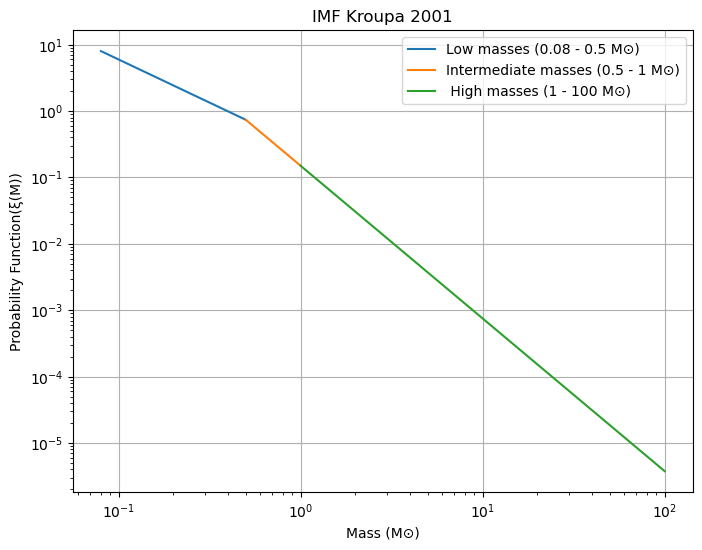

In [6]:
masas_bajas = np.linspace(0.08, 0.5, 100)
masas_intermedias = np.linspace(0.5, 1, 100)
masas_altas = np.linspace(1, 100, 100)

# Calcular los valores de la IMF para cada segmento
imf_bajas = 0.3 * masas_bajas**(-1.3)
imf_intermedias = (15/100) * masas_intermedias**(-2.3)
imf_altas = 15/100 * masas_altas**(-2.3)

# Graficar la IMF de Kroupa 2001
plt.figure(figsize=(8, 6))
plt.plot(masas_bajas, imf_bajas, label='Low masses (0.08 - 0.5 M⊙)')
plt.plot(masas_intermedias, imf_intermedias, label='Intermediate masses (0.5 - 1 M⊙)')
plt.plot(masas_altas, imf_altas, label=' High masses (1 - 100 M⊙)')
plt.xlabel('Mass (M⊙)')
plt.ylabel('Probability Function(ξ(M))')
plt.title('IMF Kroupa 2001')
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.xscale("log")
plt.show()


## 1.1) Respective function
This function serves the purpose of receiving a list of stellar masses (in solar masses) and giving us the values that the IMF would take for each mass.

In [7]:
def IMF(mass):
    imf_values = []
    for m in mass:
        if 0.08 <= m < 0.5:
            imf_value = 0.3 * m**(-1.3)
            imf_values.append(imf_value)
        elif 0.5 <= m <= 100:
            imf_value = (15/100) * m **(-2.3)
            imf_values.append(imf_value)
    return imf_values


## 1.2) Normalized IMF


In [36]:
def IMF_normalizada(mass):
    imf_values = []
    for m in mass:
        if 0.08 <= m <= 0.5:
            imf_value = 0.3 * m**(-1.3)/8.000263137087156
            imf_values.append(imf_value)
        elif 0.5 < m <= 1:
            imf_value = (15/100) * m**(-2.3)/8.000263137087156
            imf_values.append(imf_value)
        elif 1 < m <= 100:
            imf_value = (15/100) * m**(-2.3)/8.000263137087156
            imf_values.append(imf_value)
    return imf_values

def IMF_normalizada2(m):
        if 0.08 <= m <= 0.5:
            imf_value = 0.3 * m**(-1.3)/8.000263137087156
        elif 0.5 < m <= 1:
            imf_value = (15/100) * m**(-2.3)/8.000263137087156
        elif 1 < m <= 100:
            imf_value = (15/100) * m**(-2.3)/8.000263137087156
        return imf_value

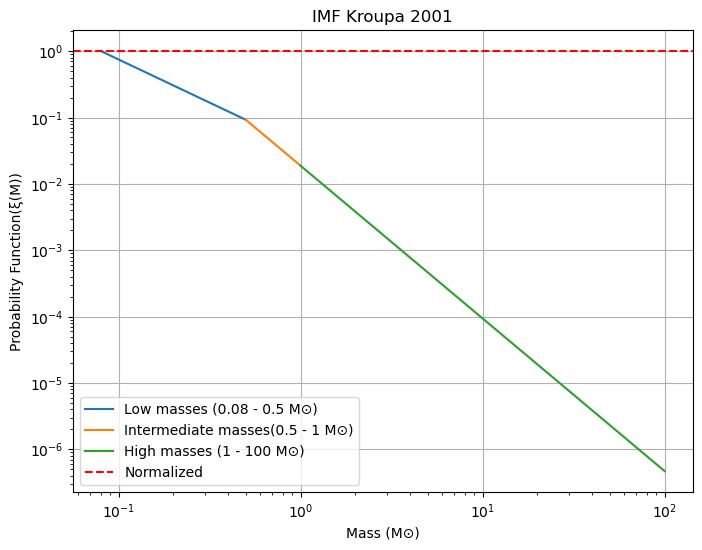

In [9]:
masas_bajas = np.linspace(0.08, 0.5, 100)
masas_intermedias = np.linspace(0.5, 1, 100)
masas_altas = np.linspace(1, 100, 100)

# Calcular los valores de la IMF para cada segmento
imf_bajas = 0.3 * masas_bajas**(-1.3)/8.000263137087156
imf_intermedias = (15/100) * masas_intermedias**(-2.3)/8.000263137087156
imf_altas = 15/100 * masas_altas**(-2.3)/8.000263137087156

# Graficar la IMF de Kroupa 2001
plt.figure(figsize=(8, 6))
plt.plot(masas_bajas, imf_bajas, label='Low masses (0.08 - 0.5 M⊙)')
plt.plot(masas_intermedias, imf_intermedias, label='Intermediate masses(0.5 - 1 M⊙)')
plt.plot(masas_altas, imf_altas, label='High masses (1 - 100 M⊙)')
plt.axhline(y=1, color='r', linestyle='--', label='Normalized')  # Línea horizontal en y=1
plt.xlabel('Mass (M⊙)')
plt.ylabel('Probability Function(ξ(M))')
plt.title('IMF Kroupa 2001')
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.xscale("log")
plt.show()


## 2) Monte Carlo 

The function "monte_carlo" receives as input an integer, which is equivalent to the number of stars to be simulated, generates a list of random masses that are evaluated in the normalized IMF to be compared with a random number between 0 and 1 to determine their fate, whether to be kept or rejected.

The process goes something like this:

| Mass     | IMF Value  | Random Number | Status |
|----------|------------|-------------- |--------------|
| 1.58     | 0.0065     | 0.59          | rejected    |
| 95.77    | 5.20e-7    |  0.31         | rejected    |
| 18.44    | 2.29e-5    | 0.70          | rejected    |
| 91.13    | 5.83e-7    | 0.17          | rejected    |

For a star to pass, it must have a value of IMF_normalized, greater than the random number generated, as we could see in the previous example, none passed the test. The output of the function is a list of the masses that passed the test.




In [38]:
def monte_carlo(rep):
    masas = [random.uniform(0.08, 100) for _ in range(rep)]
    masas_saved = []
    for masa in masas:
        prueba = random.random()
        if IMF_normalizada2(masa) > prueba:
            masas_saved.append(masa)
    return masas_saved


## 2.1) <span style="color:red">Important:</span> Input Data

In this part of the code you must place the number of stars you want to simulate, inside the brackets of the function. We recommend using large numbers, but this may take some time.


In [146]:
test = monte_carlo(10000000)

## 2.2) Check the IMF

In this part we check if we have simulated the MFI with the stars of our function, if the program throws an error in this part, it is because it needs to increase the number of stars to simulate.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


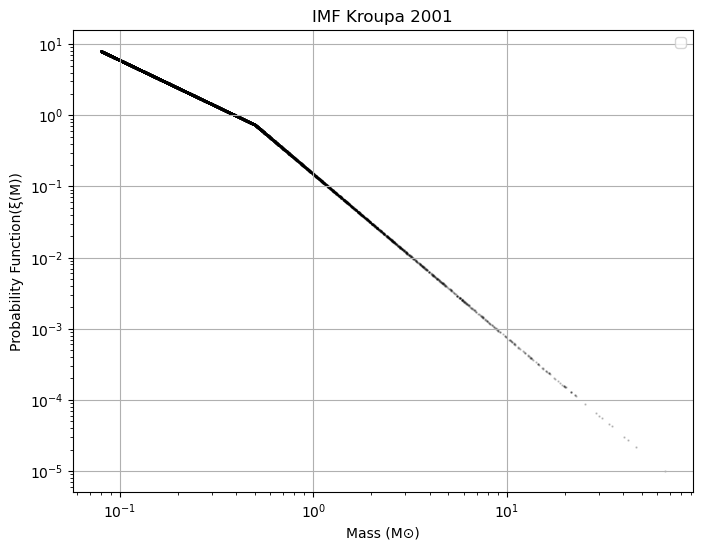

In [147]:

masas_bajas = np.linspace(0.08, 0.5, 100)
masas_intermedias = np.linspace(0.5, 1, 100)
masas_altas = np.linspace(1, 100, 100)

# Calcular los valores de la IMF para cada segmento
imf_bajas = 0.3 * masas_bajas**(-1.3)
imf_intermedias = (15/100) * masas_intermedias**(-2.3)
imf_altas = 15/100 * masas_altas**(-2.3)

# Graficar la IMF de Kroupa 2001
plt.figure(figsize=(8, 6))
#plt.plot(masas_bajas, imf_bajas, label='Bajas masas (0.08 - 0.5 M⊙)')
#plt.plot(masas_intermedias, imf_intermedias, label='Masas intermedias (0.5 - 1 M⊙)')
#plt.plot(masas_altas, imf_altas, label='Altas masas (1 - 100 M⊙)')
plt.scatter(test,IMF(test),s=0.5,color="black",alpha=0.2)

plt.xlabel('Mass (M⊙)')
plt.ylabel('Probability Function(ξ(M))')
plt.title('IMF Kroupa 2001')
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.xscale("log")
plt.show()

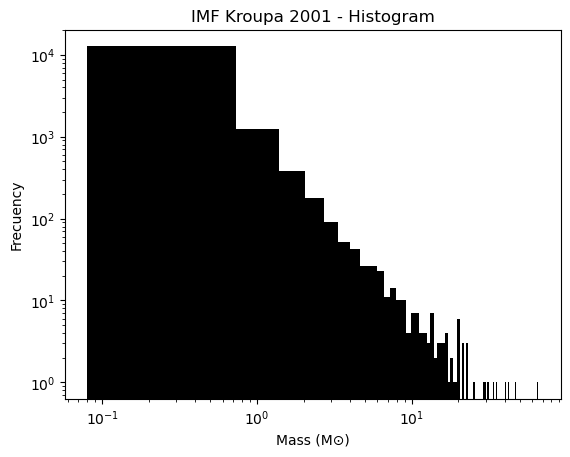

In [148]:
plt.hist(test,bins=100,color="black")
plt.xlabel('Mass (M⊙)')
plt.ylabel('Frecuency')
plt.title('IMF Kroupa 2001 - Histogram')
plt.yscale("log")
plt.xscale("log")

# 3. Table Generator

Now that we have the stellar masses approved by the monte carlo method, we want to generate a dataframe to store all the information for each star.

In [149]:
df = pd.DataFrame(test,columns=["Masses"])

## 3.1) Age generator
For each star we want to generate a random age between 0 and 1e10 

In [150]:
def dador_de_tiempo(masses):
    edades = []
    for m in masses:
        t = random.uniform(0, 10)
        edad = 10**t
        edades.append(edad)
    return edades

In [151]:
test2 = dador_de_tiempo(test)
df["log(age)"] = np.log10(test2)

## 3.2) Main sequence Time calculator

For each stellar mass we have a specific time in the main sequence we use the following formula:

$$
T_{MS} = \frac{10^{10}}{M^{2.5}}
$$


In [152]:
def T_MS(masses):
    times = []
    for m in masses:
        T = (10**10)/(m**2.5)
        times.append(T)
    return times

In [153]:
test3 = T_MS(test)

In [154]:
df["log(T_MS)"] = np.log10(test3)

### 3.2.1) Check the homogeneity of ages

Text(0, 0.5, 'Frecuency')

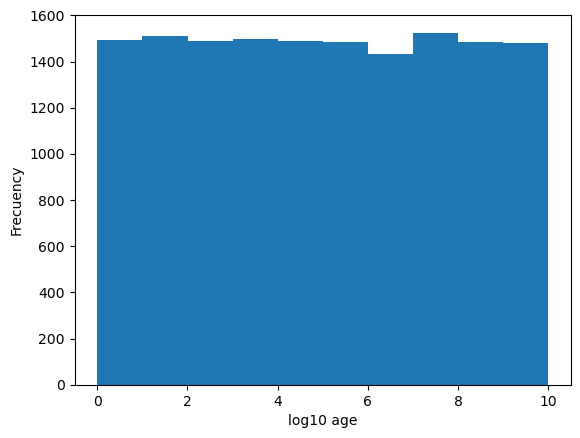

In [155]:
plt.hist(df["log(age)"],bins=10)
plt.xlabel("log10 age")
plt.ylabel("Frecuency")

#plt.xscale("log")

## 3.3) Remnants masses

For each stellar mass, we can study its remnant mass and generate an ID, which will be useful to study the evolution of each star.

| ID | Remnant |
|--------------|--------------|
| 2    | White Dwarf    |
| 1    | Black Hole    |
| 0    | Neutron Star   |

Which also serves to separate the overlap that exists in a certain mass range, in which stars can end up as BH or NS, we let randomness decide.


In [156]:
#buscar la verdadera distribucion
def remanentes(masses):
    remanentes_massas = []
    remanentes_ID = []
    for m in masses:
        numero_aleatorio = random.choice([0, 1]) #NS = 0  AND BH = 1
        
        if m <= 9:
            M = 0.109*m + 0.394
            remanentes_massas.append(M)
            ID = 2
            remanentes_ID.append(ID)
            
        elif 9<m<=13:
            Mf = 2.24 + 0.508*(m-14.75) + 0.125*(m - 14.75)**2 + 0.011*(m-14.75)**3
            remanentes_massas.append(M)
            ID = 0
            remanentes_ID.append(ID)
            
        elif 13<m<=15:
            M =  0.123 + 0.112*m
            remanentes_massas.append(M)
            ID = 0
            remanentes_ID.append(ID)
            
        elif 15<m<17.8 and numero_aleatorio == 0:
            M = -0.02 + 0.1*m
            remanentes_massas.append(M)
            ID = 0
            remanentes_ID.append(ID)
            
        elif 17.8<m<18.5 and numero_aleatorio == 0:
            M = -0.02 + 0.1*m
            remanentes_massas.append(M)
            ID = 0
            remanentes_ID.append(ID)
            
        elif 18.5<m<=25.2 and numero_aleatorio == 0:
            M = random.gauss(1.6, 0.158)
            remanentes_massas.append(M)
            ID = 0
            remanentes_ID.append(ID)
            
        elif 25.2<m<=27.5 and numero_aleatorio == 0:
            M = 3232.29 - 409.429*(m - 2.619) + 17.2867*(m - 2.619)**2 - 0.24315*(m - 2.619)**3
            remanentes_massas.append(M)
            ID = 0
            remanentes_ID.append(ID)
        
        elif 15<m<27.5 and numero_aleatorio == 1:
            M = 15.52 - 0.3294*(m - 25.97) - 0.02121*(m - 25.97)**2 + 0.00312*(m - 25.97)**3
            remanentes_massas.append(M)
            ID = 1
            remanentes_ID.append(ID)
            
        elif 27.5<m<40:
            M = 15.52 - 0.3294*(m - 25.97) - 0.02121*(m - 25.97)**2 + 0.00312*(m - 25.97)**3
            remanentes_massas.append(M)
            ID = 1
            remanentes_ID.append(ID)
        
        else:
            M = 5.697 + 7.8598 * 10**8 *(m)**(-4.858)
            remanentes_massas.append(M)
            ID = 1
            remanentes_ID.append(ID)
            
    return remanentes_massas,remanentes_ID  

In [157]:
test5 = remanentes(test)[0]
test6 = remanentes(test)[1]

In [158]:
df["remanent_mass"] = test5
df["remanent_ID"] = test6

## 3.4) Actual state

It is clear that the remnants need time to reach that state, but our analysis is at the age of the Milky Way (1e10[yr]), so we have created a function that is responsible for studying the current state of the simulated stars.

In [159]:
def actualidad(edad,TMS,ID):
    actual = []
    for t,tms,I in zip(edad,TMS,ID):
        if t<tms:
            a = "MS"
            actual.append(a)
        elif t>tms and I == 0:
            a = "Neutron_Star"
            actual.append(a)
        elif t>tms and I == 1:
            a = "Black_Hole"
            actual.append(a)
        elif t>tms and I == 2:
            a = "WD"
            actual.append(a)
    return actual
                    

In [160]:
test7 = actualidad(df["log(age)"],df["log(T_MS)"],df["remanent_ID"])
df["actual"] = test7


In [161]:
df["actual"].value_counts()

MS              14765
WD                 99
Neutron_Star       15
Black_Hole          6
Name: actual, dtype: int64

## 3.5) Save the data

We already have a fairly complete table for our analysis, and it looks like this:


In [162]:
df.head()

,Masses,log(age),log(T_MS),remanent_mass,remanent_ID,actual
0,0.597948,7.009041,10.558341,0.459176,2,MS
1,0.265567,9.443573,11.439566,0.422947,2,MS
2,0.248046,2.123821,11.513670,0.421037,2,MS
3,0.264375,8.793208,11.444447,0.422817,2,MS
4,0.772394,7.003477,10.280403,0.478191,2,MS


In [163]:
df.to_csv("output.csv", index=False)